In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset 
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Inspect the first few rows of the data
print(X.head())
print(y.head())

# Metadata
print(bank_marketing.metadata)

# Variable information
print(bank_marketing.variables)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  
    y
0  no
1  no
2  no
3  no
4  no
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url

In [6]:
# Encode categorical features
X_encoded = pd.get_dummies(X)

# Inspect the first few rows of the encoded data
print(X_encoded.head())


   age  balance  day_of_week  duration  campaign  pdays  previous  job_admin.  \
0   58     2143            5       261         1     -1         0       False   
1   44       29            5       151         1     -1         0       False   
2   33        2            5        76         1     -1         0       False   
3   47     1506            5        92         1     -1         0       False   
4   33        1            5       198         1     -1         0       False   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False              True  ...      False      False      False   
3             True             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_may  month_nov  month_oct  month_se

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8743733411972869
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93     11966
         yes       0.47      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564

Confusion Matrix:
 [[11105   861]
 [  843   755]]


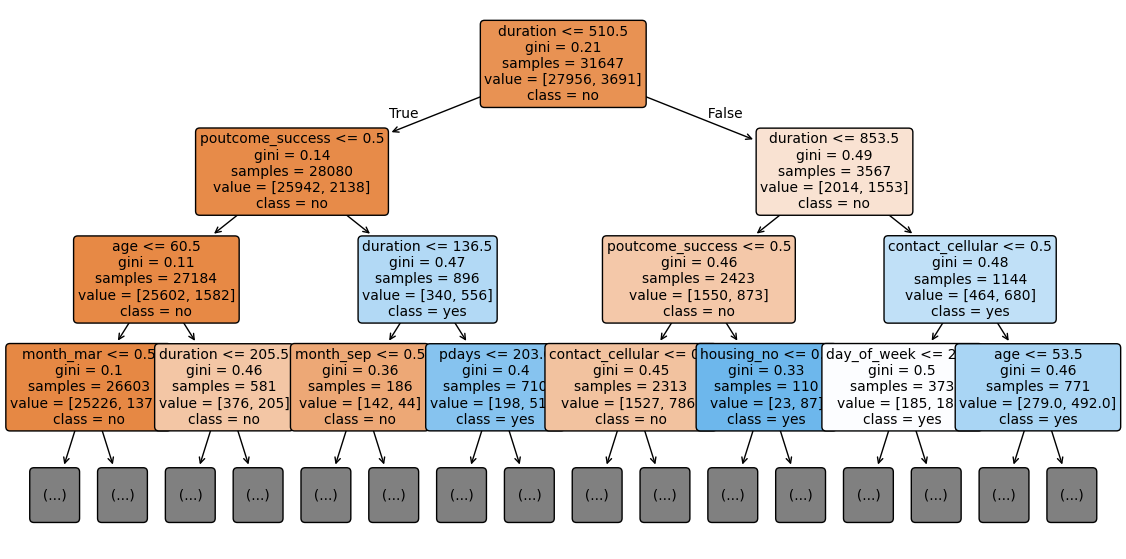

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree

# Create a smaller figure size for better visualization
plt.figure(figsize=(14, 7))

# Visualize the decision tree with limited depth
tree.plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=clf.classes_, max_depth=3,
               fontsize=10, rounded=True, precision=2)

plt.show()

